+ **NOTE**: This notebook is trained on Google Colaboratory

# Importing Libraries

In [0]:
import io
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt
%matplotlib inline

# IMDB-Reviews

## Loading Dataset

In [2]:
imdb, info = tfds.load(name="imdb_reviews", data_dir='/tmp/', with_info=True, as_supervised=True)

Shuffling and writing examples to /tmp/imdb_reviews/plain_text/1.0.0.incomplete3INTX6/imdb_reviews-train.tfrecord


Shuffling and writing examples to /tmp/imdb_reviews/plain_text/1.0.0.incomplete3INTX6/imdb_reviews-test.tfrecord


Shuffling and writing examples to /tmp/imdb_reviews/plain_text/1.0.0.incomplete3INTX6/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /tmp/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [3]:
info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=1.0.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(), dtype=tf.string),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),
    citation="""@InProceedings{maas-EtAl:2011:ACL-HLT2011,
      author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Potts, Christopher},
      title     = {Learning Word

## Splitting the Dataset

In [0]:
train_data, test_data = imdb['train'], imdb['test']

In [5]:
print(train_data)
print(test_data)

<DatasetV1Adapter shapes: ((), ()), types: (tf.string, tf.int64)>
<DatasetV1Adapter shapes: ((), ()), types: (tf.string, tf.int64)>


In [0]:
training_sentences, training_labels = [], []
testing_sentences, testing_labels = [], []

for s,l in train_data:
    training_sentences.append(str(s.numpy()))
    training_labels.append(l.numpy())
  
for s,l in test_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(l.numpy())

In [7]:
print(len(training_sentences))
print(len(training_labels))

print(len(testing_sentences))
print(len(testing_labels))

25000
25000
25000
25000


In [0]:
# converting list to numpy-array
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

## Tokenizing

In [0]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
pad_type='pre'
trunc_type='post'
oov_tok = "<OOV>"

In [0]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(training_sentences)
padded_seq = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded_seq = tf.keras.preprocessing.sequence.pad_sequences(testing_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)

In [11]:
word_index

{'<OOV>': 1,
 'the': 2,
 'and': 3,
 'a': 4,
 'of': 5,
 'to': 6,
 'is': 7,
 'br': 8,
 'in': 9,
 'it': 10,
 'i': 11,
 'this': 12,
 'that': 13,
 'was': 14,
 'as': 15,
 'for': 16,
 'with': 17,
 'movie': 18,
 'but': 19,
 'film': 20,
 "'s": 21,
 'on': 22,
 'you': 23,
 'not': 24,
 'are': 25,
 'his': 26,
 'he': 27,
 'have': 28,
 'be': 29,
 'one': 30,
 'all': 31,
 'at': 32,
 'by': 33,
 'they': 34,
 'an': 35,
 'who': 36,
 'so': 37,
 'from': 38,
 'like': 39,
 'her': 40,
 "'t": 41,
 'or': 42,
 'just': 43,
 'there': 44,
 'about': 45,
 'out': 46,
 "'": 47,
 'has': 48,
 'if': 49,
 'some': 50,
 'what': 51,
 'good': 52,
 'more': 53,
 'very': 54,
 'when': 55,
 'she': 56,
 'up': 57,
 'can': 58,
 'b': 59,
 'time': 60,
 'no': 61,
 'even': 62,
 'my': 63,
 'would': 64,
 'which': 65,
 'story': 66,
 'only': 67,
 'really': 68,
 'see': 69,
 'their': 70,
 'had': 71,
 'were': 72,
 'me': 73,
 'well': 74,
 'we': 75,
 'than': 76,
 'much': 77,
 'been': 78,
 'get': 79,
 'bad': 80,
 'will': 81,
 'people': 82,
 'do': 83,

In [12]:
len(word_index)

86539

In [13]:
print(padded_seq.shape)
print(testing_padded_seq.shape)

(25000, 120)
(25000, 120)


In [14]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
reverse_word_index

{1: '<OOV>',
 2: 'the',
 3: 'and',
 4: 'a',
 5: 'of',
 6: 'to',
 7: 'is',
 8: 'br',
 9: 'in',
 10: 'it',
 11: 'i',
 12: 'this',
 13: 'that',
 14: 'was',
 15: 'as',
 16: 'for',
 17: 'with',
 18: 'movie',
 19: 'but',
 20: 'film',
 21: "'s",
 22: 'on',
 23: 'you',
 24: 'not',
 25: 'are',
 26: 'his',
 27: 'he',
 28: 'have',
 29: 'be',
 30: 'one',
 31: 'all',
 32: 'at',
 33: 'by',
 34: 'they',
 35: 'an',
 36: 'who',
 37: 'so',
 38: 'from',
 39: 'like',
 40: 'her',
 41: "'t",
 42: 'or',
 43: 'just',
 44: 'there',
 45: 'about',
 46: 'out',
 47: "'",
 48: 'has',
 49: 'if',
 50: 'some',
 51: 'what',
 52: 'good',
 53: 'more',
 54: 'very',
 55: 'when',
 56: 'she',
 57: 'up',
 58: 'can',
 59: 'b',
 60: 'time',
 61: 'no',
 62: 'even',
 63: 'my',
 64: 'would',
 65: 'which',
 66: 'story',
 67: 'only',
 68: 'really',
 69: 'see',
 70: 'their',
 71: 'had',
 72: 'were',
 73: 'me',
 74: 'well',
 75: 'we',
 76: 'than',
 77: 'much',
 78: 'been',
 79: 'get',
 80: 'bad',
 81: 'will',
 82: 'people',
 83: 'do',

In [15]:
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded_seq[3]))
print(training_sentences[3])

# ? => key not present in reverse_word_index (i.e., basically 0's as they were padded)

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? b'this is the kind of film for a snowy sunday afternoon when the rest of the world can go ahead with its own business as you <OOV> into a big arm chair and <OOV> for a couple of hours wonderful performances from cher and nicolas cage as always gently row the plot along there are no <OOV> to cross no dangerous waters just a warm and witty <OOV> through new york life at its best a family film in every sense and one that deserves the praise it received '
b'This is the kind of film for a snowy Sunday afternoon when the rest of the world can go ahead with its own business as you descend into a big arm-chair and mellow for a couple of hours. Wonderful performances from Cher and Nicolas Cage (as always) gently row the plot along. There are no rapids to cross, no dangerous waters, just a warm and witty paddle through New York life at its best. A family film in every sense and one that deserves the praise it received.'


## Creating the Model

**Embedding Layer**
* Input shape:
    2D tensor with shape: `(batch_size, input_length)`.
* Output shape:
    3D tensor with shape: `(batch_size, input_length, output_dim)`.

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=6, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 11526     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Training the Model

In [18]:
num_epochs = 10
model.fit(padded_seq, training_labels_final, epochs=num_epochs, validation_data=(testing_padded_seq, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 5s 6ms/step - loss: 0.4901 - accuracy: 0.7429 - val_loss: 0.3891 - val_accuracy: 0.8226
Epoch 2/10
782/782 [==============================] - 5s 6ms/step - loss: 0.2362 - accuracy: 0.9090 - val_loss: 0.4186 - val_accuracy: 0.8166
Epoch 3/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0882 - accuracy: 0.9781 - val_loss: 0.5237 - val_accuracy: 0.8045
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0215 - accuracy: 0.9971 - val_loss: 0.6112 - val_accuracy: 0.8036
Epoch 5/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0051 - accuracy: 0.9997 - val_loss: 0.6907 - val_accuracy: 0.8044
Epoch 6/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.7483 - val_accuracy: 0.8065
Epoch 7/10
782/782 [==============================] - 5s 6ms/step - loss: 7.9801e-04 - accuracy: 1.0000 - val_loss: 0.8005 - val_accuracy: 0.8070
Ep

In [19]:
e = model.layers[0]
weights = e.get_weights()[0]

print(weights.shape)
# shape: (vocab_size, embedding_dim)

(10000, 16)


In [20]:
sentence = ["I really think this is amazing. honest."]
sequence = tokenizer.texts_to_sequences(sentence)
print(sequence[0])

[11, 68, 105, 12, 7, 491, 1216]


## Embedding Projector

In [0]:
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for word_num in range(1, vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")

out_v.close()
out_m.close()

In [0]:
try:
    from google.colab import files
except ImportError:
    pass
else:
    files.download('vecs.tsv')
    files.download('meta.tsv')

+ Embeddings can be explored on [Embedding Projector](https://projector.tensorflow.org/)

# IMDB-Reviews/subwords8k

## Loading Dataset

In [23]:
imdb, info = tfds.load(name="imdb_reviews/subwords8k", data_dir='/tmp/', with_info=True, as_supervised=True)
train_data, test_data = imdb['train'], imdb['test']

Shuffling and writing examples to /tmp/imdb_reviews/subwords8k/1.0.0.incompleteEKY0X0/imdb_reviews-train.tfrecord


Shuffling and writing examples to /tmp/imdb_reviews/subwords8k/1.0.0.incompleteEKY0X0/imdb_reviews-test.tfrecord


Shuffling and writing examples to /tmp/imdb_reviews/subwords8k/1.0.0.incompleteEKY0X0/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /tmp/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [24]:
info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=1.0.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),
    citation="""@InProceedings{maas-EtAl:2011:ACL-HLT2011,
      author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Pot

## Loading Encoder

In [0]:
tokenizer = info.features['text'].encoder

In [26]:
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [27]:
sample_string = 'TensorFlow, from basics to mastery'

tokenized_string = tokenizer.encode(sample_string)
print ('Tokenized string is {}'.format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print ('The original string: {}'.format(original_string))

Tokenized string is [6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]
The original string: TensorFlow, from basics to mastery


In [28]:
for ts in tokenized_string:
    print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
2 ----> , 
48 ----> from 
4249 ----> basi
4429 ----> cs 
7 ----> to 
2652 ----> master
8050 ----> y


## Creating the Model

In [0]:
embedding_dim = 64

### Shallow Network

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=tokenizer.vocab_size, output_dim=embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(units=6, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


### Single-layer RNN

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=tokenizer.vocab_size, output_dim=embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 548,673
Trainable params: 548,673
Non-trainable params: 0
_________________________________________________________________


### 1D-Convolution layer Model

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=tokenizer.vocab_size, output_dim=embedding_dim),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),  # 128 filters each of 5 words
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


### Single-layer GRU

In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=tokenizer.vocab_size, output_dim=embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                18816     
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 7         
Total params: 543,053
Trainable params: 543,053
Non-trainable params: 0
_________________________________________________________________


### Single-layer LSTM Model

In [34]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=tokenizer.vocab_size, output_dim=embedding_dim),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                33024     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 561,089
Trainable params: 561,089
Non-trainable params: 0
_________________________________________________________________


In [35]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=tokenizer.vocab_size, output_dim=embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


### Multiple-layer LSTM Model

In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=tokenizer.vocab_size, output_dim=embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_3 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_4 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
BUFFER_SIZE = 1000
BATCH_SIZE = 32

train_batches = (
    train_data
    .shuffle(BUFFER_SIZE)
    .padded_batch(BATCH_SIZE))

test_batches = (
    test_data
    .padded_batch(BATCH_SIZE))

In [39]:
num_epochs = 10
history = model.fit(train_batches, epochs=num_epochs, validation_data=test_batches)

Epoch 1/10
782/782 [==============================] - 175s 224ms/step - loss: 0.6235 - accuracy: 0.6480 - val_loss: 0.5599 - val_accuracy: 0.7370
Epoch 2/10
782/782 [==============================] - 176s 224ms/step - loss: 0.3671 - accuracy: 0.8414 - val_loss: 0.3632 - val_accuracy: 0.8394
Epoch 3/10
782/782 [==============================] - 175s 224ms/step - loss: 0.2270 - accuracy: 0.9110 - val_loss: 0.3295 - val_accuracy: 0.8734
Epoch 4/10
782/782 [==============================] - 175s 224ms/step - loss: 0.1611 - accuracy: 0.9415 - val_loss: 0.3757 - val_accuracy: 0.8726
Epoch 5/10
782/782 [==============================] - 176s 225ms/step - loss: 0.1170 - accuracy: 0.9599 - val_loss: 0.4158 - val_accuracy: 0.8657
Epoch 6/10
782/782 [==============================] - 176s 225ms/step - loss: 0.0898 - accuracy: 0.9711 - val_loss: 0.4946 - val_accuracy: 0.8504
Epoch 7/10
782/782 [==============================] - 177s 226ms/step - loss: 0.0670 - accuracy: 0.9794 - val_loss: 0.4618 -

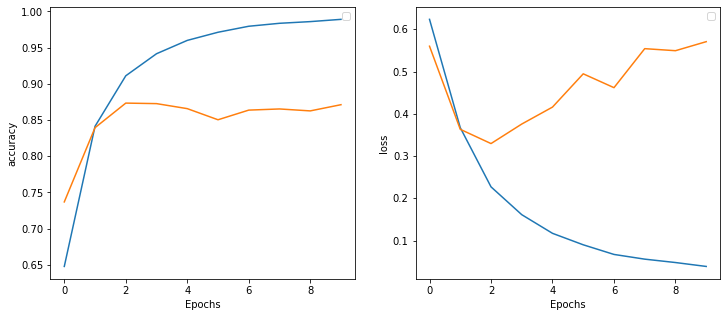

In [47]:
plt.figure(figsize=(12, 5))
def plot_graphs(history, string, i):
    plt.subplot(1, 2, i)
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
  
plot_graphs(history, "accuracy", 1)
plot_graphs(history, "loss", 2)

In [41]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(8185, 64)


## Embedding Projector

In [0]:
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, tokenizer.vocab_size):
    word = tokenizer.decode([word_num])
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()


try:
    from google.colab import files
except ImportError:
    pass
else:
    files.download('vecs.tsv')
    files.download('meta.tsv')